In [31]:
from disease_model import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [8]:
# model = DiseaseModel(10)
# for i in range (10):
#     model.step()

# disease_spread = [a.state for a in model.schedule.agents]

# plt.hist(disease_spread)

# disease_total = []
# for j in range(100):
#     model = DiseaseModel(10)
#     for i in range(10):
#         model.step()

#     for agent in model.schedule.agents:
#         disease_total.append(agent.state)

# plt.hist(disease_total, bins=range(max(disease_total)+1))

In [40]:
number_of_people = 500
width_of_grid = 50
height_of_grid = 50
number of iterations = 200

model = DiseaseModel(number_of_people, width_of_grid, height_of_grid)
for i in range(iterations):
    model.step()

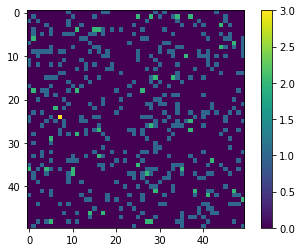

In [41]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

<AxesSubplot:>

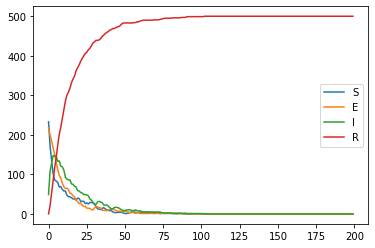

In [42]:
import itertools
agent_state = model.datacollector.get_model_vars_dataframe()
l = agent_state.values.tolist()
#Flattening the incoming list of lists of dictionaries code taken from:
#https://stackoverflow.com/a/953097/926543
merged = pd.DataFrame(list(itertools.chain.from_iterable(l)))

merged.plot()

In [43]:
from mesa.batchrunner import BatchRunner

In [44]:
fixed_params = {"width": 50,
               "height": 50}
variable_params = {"N": range(10, 510, 10)}

batch_run = BatchRunner(DiseaseModel,
                        variable_params,
                        fixed_params,
                        iterations=5,
                        max_steps=100,
                        model_reporters={"Current State": infection_rates})
batch_run.run_all()

250it [01:17,  3.24it/s]


<AxesSubplot:>

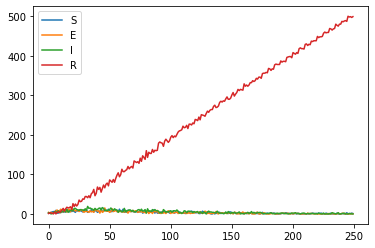

In [57]:
run_data = batch_run.get_model_vars_dataframe()
populations = run_data["Current State"].values.tolist()
merged_pop = pd.DataFrame(populations)
merged_pop.plot()
# merged_pop.head
# plt.scatter(run_data.N, run_data.Gini)